<a href="https://colab.research.google.com/github/IanCastillo0621/Destilacion-de-conocimientos-para-clasificaci-n/blob/main/Knowledge_Distilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre procesamiento de Datos

## I. Importe de las librerías

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection
from sklearn.decomposition import PCA

## II. Carga del dataset Fashion MNIST

In [ ]:
data_fashion_mnist = tf.keras.datasets.fashion_mnist

## III. Conjunto ENTRENAMIENTO y conjunto PRUEBA

### i. dividir en conjunto de ENTRENAMIENTO y en conjunto de PRUEBA

In [ ]:
(x_train,y_train),(x_test,y_test) = data_fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### ii. desplegar dimensiones del conjunto de ENTRENAMIENTO y del conjunto de PRUEBA

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


## IV. Visualización de imágenes del dataset Fashion MNIST

### i. Mapear etiqueta a nombre

In [ ]:
dicc = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
print(dicc)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


### ii. Desplegar imágenes del dataset Fashion MNIST

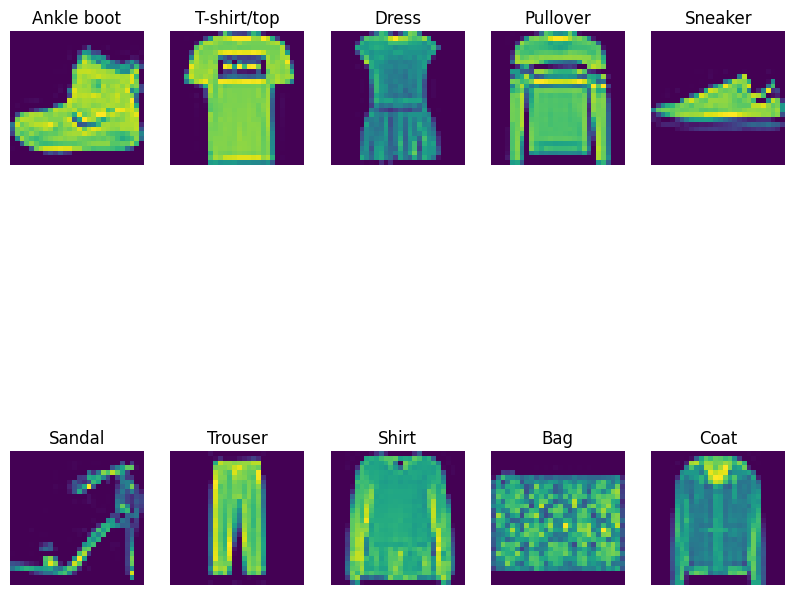

In [ ]:
cc = [0,1,3,5,6,8,21,18,23,28]
fig=plt.figure(figsize=(10,10))
k=1
for i in cc:
  fig.add_subplot(2, 5, k)
  plt.imshow(x_train[i])
  plt.title(dicc[y_train[i]])
  plt.axis('off')
  k += 1

## V. Pre-procesamiento sobre los datos

In [ ]:
#Las imágenes se normalizan y se convierten a escala de grises, al no ser el color relevante para la clasificación.
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)
print(y_train[0])
print(ytrain[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Red Neuronal Convolucional (CNN)


## VI. Creación Red Neuronal Convolucional (CNN)

In [ ]:
model = tf.keras.models.Sequential([

   # convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),

   # pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'),

   # pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # flatten:
   tf.keras.layers.Flatten(),

   # fully connection:
   tf.keras.layers.Dense(240, activation='relu'),

   # fully conection:
   tf.keras.layers.Dense(180, activation='relu'),

   # fully connection:
   tf.keras.layers.Dense(120, activation='relu'),

   # output
   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
   ])

## VI. Definición de hiperparámetros de Red Neuronal Convolucional (CNN)

In [ ]:
n_epochs=25
n_batch=60
learning_rate=0.001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

## VII. Compilación Red Neuronal Convolucional (CNN)

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## VIII. Entrenamiento Red Neuronal Convolucional (CNN)

In [ ]:
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest), epochs=n_epochs, batch_size=n_batch)

Epoch 1/25
 322/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.1762 - loss: 2.2838

KeyboardInterrupt: 

## IX. Curvas de aprendizaje

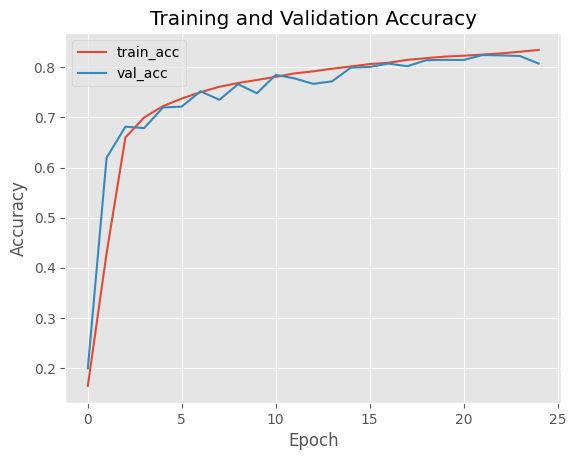

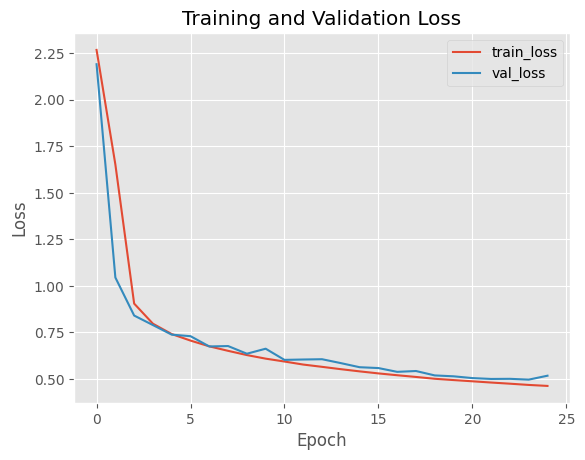

In [ ]:
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

## X. Métricas de evaluación del desempeño

In [ ]:
predictions_train = model.predict(x_train, batch_size=n_batch)
print(classification_report(ytrain.argmax(axis=1),
      predictions_train.argmax(axis=1),target_names=labels))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.84      0.80      6000
     Trouser       0.98      0.95      0.96      6000
    Pullover       0.55      0.85      0.67      6000
       Dress       0.85      0.86      0.85      6000
        Coat       0.67      0.74      0.70      6000
      Sandal       0.99      0.80      0.89      6000
       Shirt       0.67      0.17      0.27      6000
     Sneaker       0.86      0.94      0.90      6000
         Bag       0.92      0.96      0.94      6000
  Ankle boot       0.89      0.97      0.93      6000

    accuracy                           0.81     60000
   macro avg       0.82      0.81      0.79     60000
weighted avg       0.82      0.81      0.79     60000



In [ ]:
predictions_test = model.predict(x_test, batch_size=n_batch)
print(classification_report(ytest.argmax(axis=1),
      predictions_test.argmax(axis=1),target_names=labels))

167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.81      0.79      1000
     Trouser       0.98      0.93      0.96      1000
    Pullover       0.51      0.89      0.65      1000
       Dress       0.84      0.85      0.84      1000
        Coat       0.78      0.48      0.60      1000
      Sandal       0.97      0.89      0.93      1000
       Shirt       0.62      0.37      0.46      1000
     Sneaker       0.88      0.94      0.91      1000
         Bag       0.92      0.95      0.94      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.80     10000
weighted avg       0.82      0.81      0.80     10000



## XI. Matriz de confusión

In [ ]:
confusion_matrix(ytrain.argmax(axis=1), predictions_train.argmax(axis=1))

array([[5023,   14,  257,  290,   36,    4,  277,    0,   97,    2],
       [  19, 5695,   54,  188,   25,    2,   10,    0,    6,    1],
       [  33,    3, 5092,   44,  678,    4,   65,    1,   80,    0],
       [ 212,   93,  195, 5133,  277,    1,   53,    1,   35,    0],
       [  10,    7, 1280,  177, 4447,    1,   40,    0,   37,    1],
       [   5,    1,    1,    2,    1, 4828,    0,  732,   49,  381],
       [1215,   13, 2280,  159, 1157,    0, 1026,    1,  148,    1],
       [   0,    0,    0,    0,    0,   30,    0, 5648,   10,  312],
       [  16,    0,   94,   25,   28,    6,   50,   36, 5733,   12],
       [   0,    0,    2,    1,    0,    6,    0,  184,    5, 5802]])

In [ ]:
confusion_matrix(ytest.argmax(axis=1), predictions_test.argmax(axis=1))

array([[807,   0,  44,  45,   3,   0,  84,   0,  17,   0],
       [  6, 933,  11,  40,   3,   1,   5,   0,   1,   0],
       [ 14,   2, 892,   8,  46,   0,  24,   0,  14,   0],
       [ 29,  15,  39, 849,  24,   0,  38,   0,   6,   0],
       [  0,   0, 406,  35, 485,   1,  66,   0,   7,   0],
       [  1,   0,   0,   3,   0, 892,   0,  72,   3,  29],
       [180,   1, 335,  29,  56,   0, 369,   0,  30,   0],
       [  0,   0,   0,   0,   0,  19,   0, 945,   0,  36],
       [  1,   1,  21,   4,   1,   2,   8,   6, 955,   1],
       [  1,   0,   0,   0,   0,   6,   0,  46,   0, 947]])

## XII. Resumen Red Neuronal Convolucional (CNN)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (60, 28, 28, 6)        │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (60, 14, 14, 6)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (60, 10, 10, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (60, 5, 5, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (60, 400)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (60, 240)              │        96,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (60, 180)              │        43,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (60, 120)              │        21,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (60, 10)               │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,124 (645.02 KB)

 Trainable params: 165,122 (645.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# LDA (Teacher)

## Crear LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1) / 255.0

lda = LinearDiscriminantAnalysis(n_components=10)
x_train_lda = lda.fit_transform(x_train_flat, y_train)
x_test_lda = lda.transform(x_test_flat)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [ ]:
x_train_lda.shape

(60000, 7)

## Entrenar regresor Logistico Multiclase

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 4. Train a classifier on LDA-transformed data
classifier = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
classifier.fit(x_train_flat, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 4. Train a classifier on LDA-transformed data
classifier = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
classifier.fit(x_train_lda, y_train)

LogisticRegression(max_iter=1000)

## Resultados y visualizaciones

In [ ]:
y_pred_train = classifier.predict(x_train_flat)
accuracy = classifier.score(x_train_flat, y_train)
precision = precision_score(y_train, y_pred_train, average='macro')
recall = recall_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_train, y_pred_train, average='macro')

print(f'Resultados train')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print('\n')

y_pred_test = classifier.predict(x_test_flat)
accuracy = classifier.score(x_test_flat, y_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')
print(f'Resultados test')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")

Resultados train
Accuracy: 0.7017
Precision (macro): 0.6980
Recall (macro): 0.7017
F1 Score (macro): 0.6824


Resultados test
Accuracy: 0.6990
Precision (macro): 0.6929
Recall (macro): 0.6990
F1 Score (macro): 0.6793


In [ ]:
y_pred_train = classifier.predict(x_train_lda)
accuracy = classifier.score(x_train_lda, y_train)
precision = precision_score(y_train, y_pred_train, average='macro')
recall = recall_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_train, y_pred_train, average='macro')

print(f'Resultados train')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print('\n')

y_pred_test = classifier.predict(x_test_lda)
accuracy = classifier.score(x_test_lda, y_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')
print(f'Resultados test')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")

Resultados train
Accuracy: 0.8418
Precision (macro): 0.8409
Recall (macro): 0.8418
F1 Score (macro): 0.8411


Resultados test
Accuracy: 0.8241
Precision (macro): 0.8229
Recall (macro): 0.8241
F1 Score (macro): 0.8232


In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

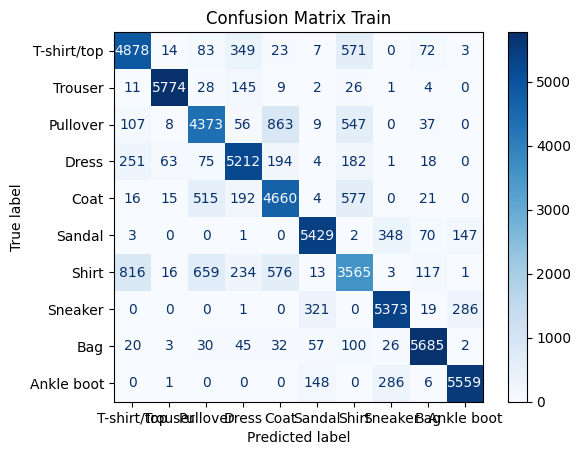

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=list(dicc.values()))
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix Train")
plt.show()

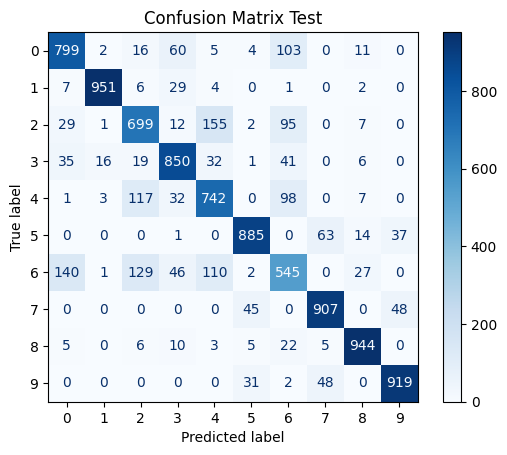

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix Test")
plt.show()

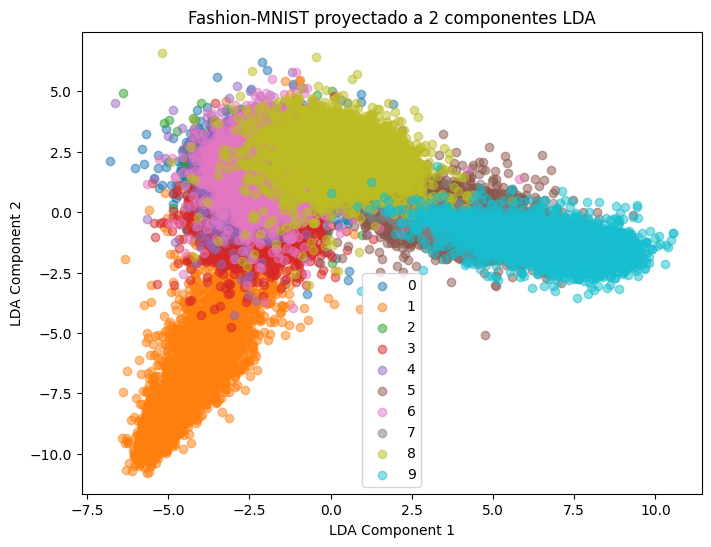

In [ ]:
import matplotlib.pyplot as plt

# Proyectar solo a 2 componentes para graficar
lda_2d = LinearDiscriminantAnalysis(n_components=2)
x_train_2d = lda_2d.fit_transform(x_train_flat, y_train)

plt.figure(figsize=(8,6))
for i in range(10):
    plt.scatter(x_train_2d[y_train==i,0], x_train_2d[y_train==i,1], label=str(i), alpha=0.5)
plt.legend()
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("Fashion-MNIST proyectado a 2 componentes LDA")
plt.show()


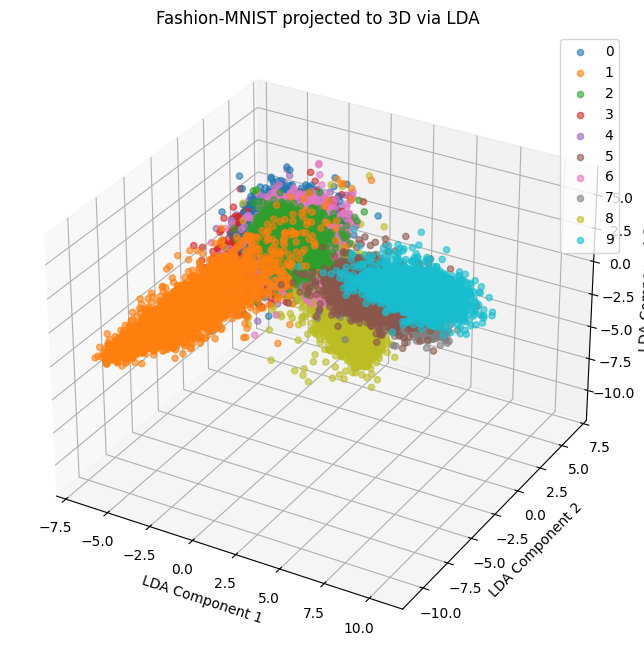

In [ ]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tensorflow.keras.datasets import fashion_mnist
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Load data
(x_train, y_train), _ = fashion_mnist.load_data()
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0

# Apply LDA (3 components)
lda_3d = LinearDiscriminantAnalysis(n_components=3)
x_train_3d = lda_3d.fit_transform(x_train_flat, y_train)

# Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
          'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

for i in range(10):
    ax.scatter(
        x_train_3d[y_train == i, 0],
        x_train_3d[y_train == i, 1],
        x_train_3d[y_train == i, 2],
        label=str(i),
        alpha=0.6,
        color=colors[i]
    )

ax.set_xlabel('LDA Component 1')
ax.set_ylabel('LDA Component 2')
ax.set_zlabel('LDA Component 3')
ax.set_title('Fashion-MNIST projected to 3D via LDA')
ax.legend()
plt.show()


# PCA

In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
pca.fit(x_train_flat)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)


[0.29039228 0.46794538 0.5281376  0.57771188 0.61618843 0.65079612
 0.67421303 0.69326717 0.7067656  0.71990827 0.72983702 0.73896957
 0.7466275  0.75322455 0.75930306 0.76520127 0.77072062 0.77596562
 0.7805464  0.78510155 0.78943839 0.79350936 0.79735694 0.80108246
 0.80469352 0.80820008 0.8115325  0.81472609 0.81780672 0.82073945
 0.82349548 0.8261461  0.82878313 0.83134148 0.83380361 0.83616262
 0.83846552 0.84072074 0.8429055  0.84499874 0.84700157 0.84895896
 0.85090586 0.85273369 0.85448723 0.85620649 0.85789441 0.85953416
 0.86114324 0.8626917  0.86421465 0.8657151  0.86718305 0.86861617
 0.86999894 0.87136891 0.87268046 0.87396892 0.87524141 0.87649992
 0.87771445 0.87891643 0.88009786 0.88126044 0.88241627 0.88353922
 0.88464997 0.88574666 0.88679794 0.88784453 0.88887554 0.88988605
 0.890864   0.89182089 0.89276004 0.89369387 0.89461917 0.89552173
 0.89641498 0.8972868  0.89814088 0.89898378 0.89980892 0.90062313
 0.90142826 0.90222577 0.90300219 0.90377166 0.90453547 0.9052

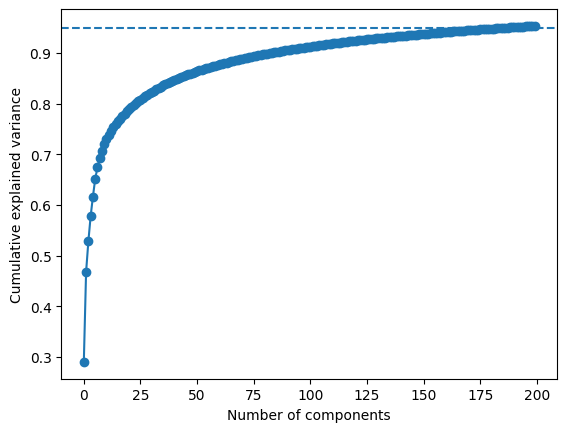

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.axhline(0.95, linestyle='--')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

scores = []
components = range(1, x_train_flat.shape[1]+1)

for k in [100, 150, 180, 190, 200, 210, 220, 300, 700]:
  print(k)
  pca = PCA(n_components=k)
  X_pca = pca.fit_transform(x_train_flat)
  score = cross_val_score(LinearRegression(), X_pca, y_train, cv=5).mean()
  scores.append(score)

best_k = components[scores.index(max(scores))]
print(best_k)


100
150
180
190
200
210
220
300
700
9


# Student tought by Teacher

In [ ]:
print(soft_labels.shape)
print(x_train_lda.shape)

(60000, 10)
(60000, 9)


In [ ]:
soft_labels = model.predict(x_train)  # shape (54000, 10)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step


In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

student = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_lda.shape[1],)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
student.compile(optimizer='adam',
                loss='categorical_crossentropy',  # usar soft_labels
                metrics=['accuracy'])

# Entrenamiento
Historia2 = student.fit(x_train_lda, soft_labels, epochs=30, batch_size=128, validation_split=0.1)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5504 - loss: 1.4301 - val_accuracy: 0.8728 - val_loss: 0.3615
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8436 - loss: 0.4630 - val_accuracy: 0.8732 - val_loss: 0.3410
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.4214 - val_accuracy: 0.8745 - val_loss: 0.3335
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8574 - loss: 0.4058 - val_accuracy: 0.8757 - val_loss: 0.3302
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.3951 - val_accuracy: 0.8758 - val_loss: 0.3278
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8614 - loss: 0.3902 - val_accuracy: 0.8762 - val_loss: 0.3262
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8621 - loss: 0.3856 - val_accuracy: 0.8763 - val_loss: 0.3234
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8633 - loss: 0.3810 - val_accuracy: 0.8778 - val_

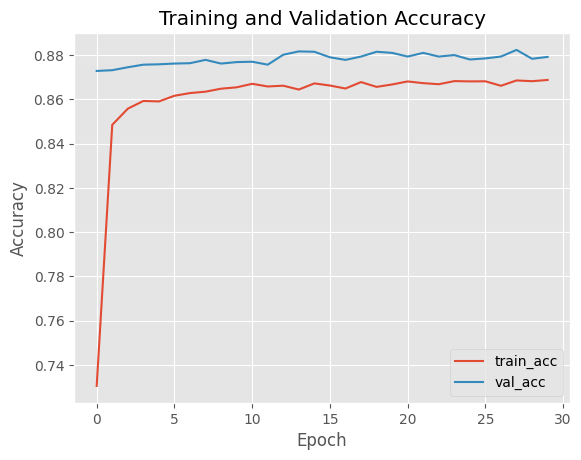

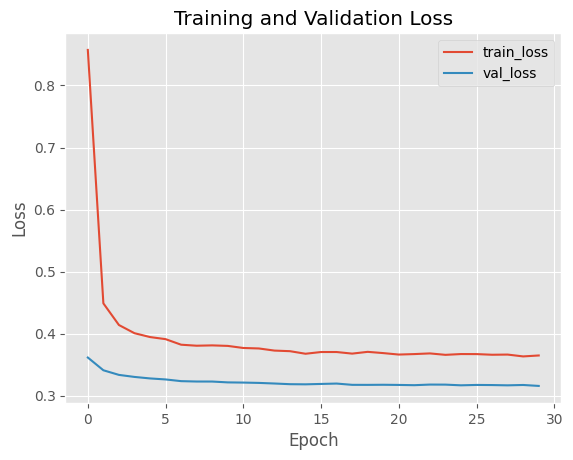

In [ ]:
H = Historia2
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(H.history["accuracy"])),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0, len(H.history["val_accuracy"])),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0, len(H.history["loss"])),H.history["loss"],label="train_loss")
plt.plot(np.arange(0, len(H.history["val_loss"])),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
y_pred_train_mlp = student.predict(x_train_lda)
loss, accuracy = student.evaluate(x_train_lda, soft_labels, verbose=0)
precision = precision_score(y_train, y_pred_train_mlp.argmax(axis=1), average='macro')
recall = recall_score(y_train, y_pred_train_mlp.argmax(axis=1), average='macro')
f1 = f1_score(y_train, y_pred_train_mlp.argmax(axis=1), average='macro')

print(f'Resultados train')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print('\n')

y_pred_test_mlp = student.predict(x_test_lda)
loss, accuracy = student.evaluate(x_test_lda, ytest, verbose=0)
precision = precision_score(y_test, y_pred_test_mlp.argmax(axis=1), average='macro')
recall = recall_score(y_test, y_pred_test_mlp.argmax(axis=1), average='macro')
f1 = f1_score(y_test, y_pred_test_mlp.argmax(axis=1), average='macro')
print(f'Resultados test')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Resultados train
Accuracy: 0.8777
Precision (macro): 0.8123
Recall (macro): 0.7984
F1 Score (macro): 0.7683


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Resultados test
Accuracy: 0.7864
Precision (macro): 0.7948
Recall (macro): 0.7864
F1 Score (macro): 0.7586


In [ ]:
cm_train_mlp = confusion_matrix(y_train, y_pred_train_mlp.argmax(axis=1))
cm_test_mlp = confusion_matrix(y_test, y_pred_test_mlp.argmax(axis=1))

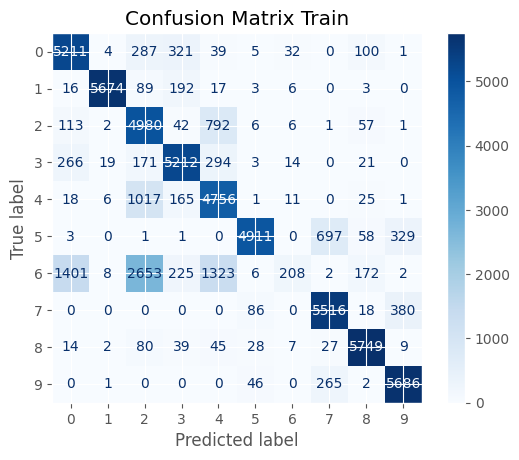

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train_mlp, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix Train")
plt.show()

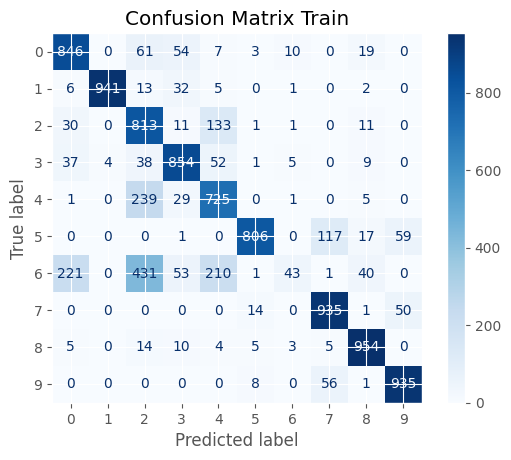

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_mlp, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix Train")
plt.show()

In [ ]:
student.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,872 (15.13 KB)

 Trainable params: 1,290 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,582 (10.09 KB)